# Question 6

In [1]:
#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [2]:
#Importing Data
df_main = pd.read_csv('./toy_dataset.csv')
df_main.describe()

,x1,x2,y
count,300.000000,300.000000,300.000000
mean,0.476086,0.228097,0.500000
std,0.880292,0.557703,0.500835
min,-1.402583,-1.017261,0.000000
25%,-0.123975,-0.217225,0.000000
50%,0.491700,0.263853,0.500000
75%,1.087036,0.673868,1.000000
max,2.528373,1.450845,1.000000


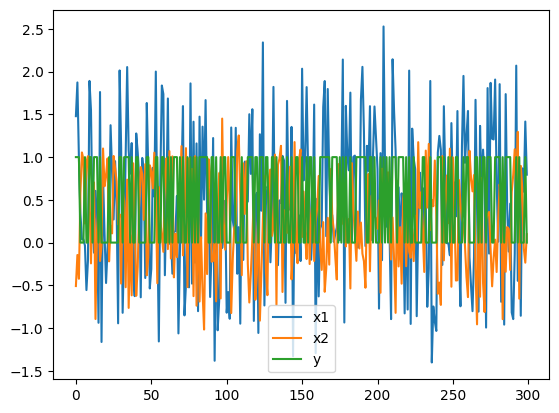

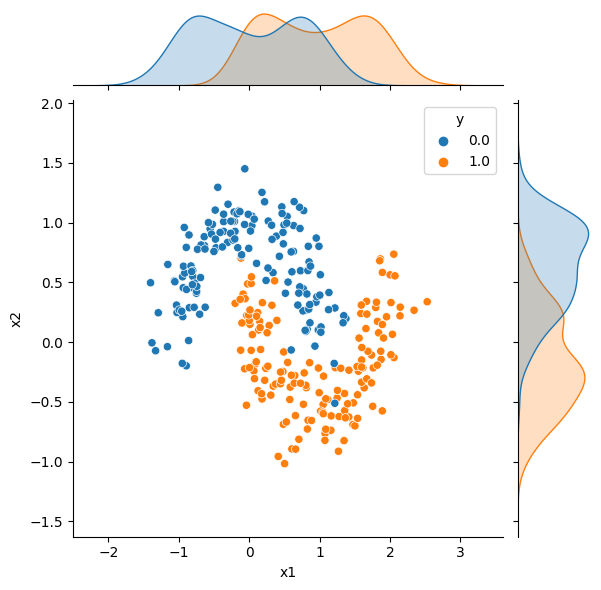

In [22]:
#Visualizing Exploration
a = df_main.plot()
b = sns.jointplot(data=df_main, x="x1", y="x2", hue="y")

## Part A

In [31]:
#Classifications

#Seperation of Variables
x = df_main.drop('y', axis=1).values
y = df_main['y']

#Linear Classification
linKer = svm.SVC(kernel='linear')
linKer = linKer.fit(x, y)

#Polynomial Classification
polyKer = svm.SVC(kernel='poly')
polyKer = polyKer.fit(x, y)

#RBF Classification
rbfKer = svm.SVC(kernel='rbf')
rbfKer = rbfKer.fit(x, y)

In [28]:
## Given helper function for plotting Classifiers
def plot_decision_svm(X, y, clf, kernel_name = 'Linear'):

  # X -- The data points
  # y -- The labels
  # clf -- The classifier
  # Kernel_name -- name of the kernel: string Linear, poly, RBF

  ax = plt.subplot(1, 1, 1)
  h = 0.05 # step size
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot the points
  ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
 
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  #ax.set_xticks(())
  #ax.set_yticks(())

  ax.set_title(kernel_name)
  plt.tight_layout()
  plt.show()

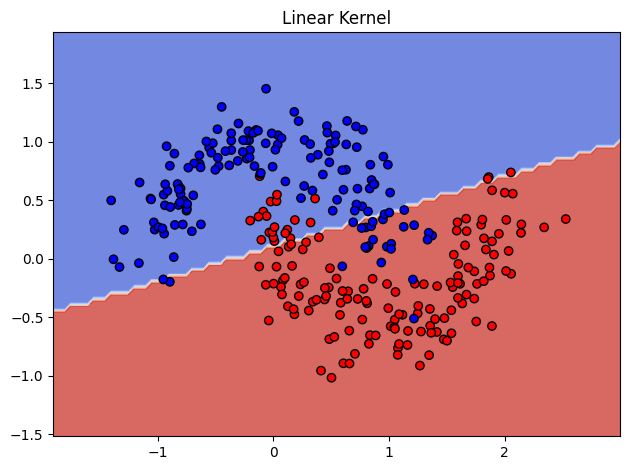

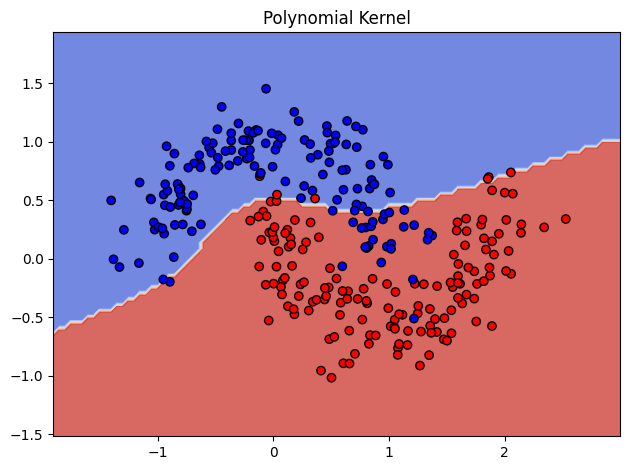

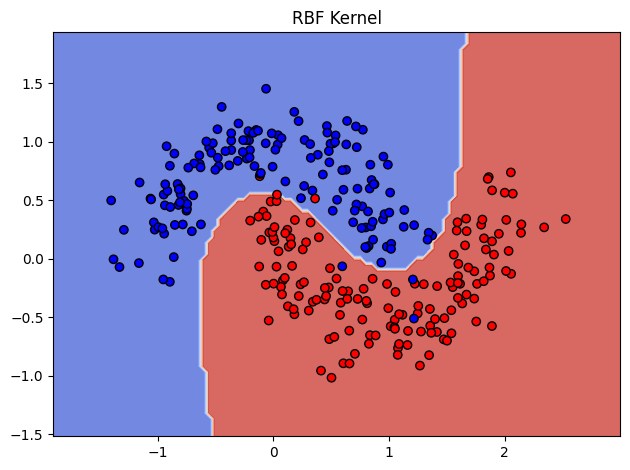

In [32]:
#Plotting Classifiers

#Linear
plot_decision_svm(x, y, linKer, 'Linear Kernel')

#Polynomial
plot_decision_svm(x, y, polyKer, 'Polynomial Kernel')

#RBF
plot_decision_svm(x, y, rbfKer, 'RBF Kernel')

## Part B

In [34]:
#Creating the gmaPara
gmaPara = {'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 2], 'C': [1e-2, 1e-1, 1, 2, 5, 10]}
#Intialize the rbf kernel
svmRbfKer = svm.SVC(kernel='rbf')
#Grid search cv of svmRbfKer
resCls = GridSearchCV(svmRbfKer, gmaPara, cv=3, return_train_score=True)
resCls = resCls.fit(x, y)

In [35]:
#Helper function for visualize the grid search
def heatmap(grid):
    """
    grid --  GridSearchCV instance  
    """
    pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
        values='mean_test_score', index='param_C', columns='param_gamma')
    ax = sns.heatmap(pvt, annot=True)
    ax.invert_yaxis()

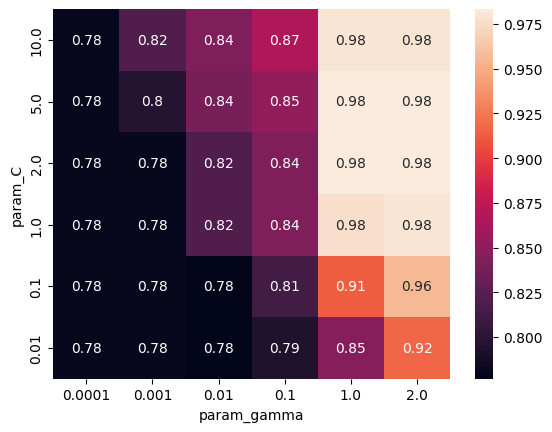

In [36]:
#Plotting the Headmap
heatmap(resCls)

In [37]:
#Inspection of Resulting Classifier
df_resCls = pd.DataFrame(resCls.cv_results_)
df_resCls.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.002083,0.000061,0.003028,0.000663,0.01,0.0001,"{'C': 0.01, 'gamma': 0.0001}",0.82,0.72,0.80,0.780000,0.043205,25,0.745,0.790,0.79,0.775000,0.021213
1,0.001848,0.000221,0.002803,0.000713,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.82,0.72,0.80,0.780000,0.043205,25,0.745,0.790,0.79,0.775000,0.021213
2,0.002337,0.000996,0.003232,0.000692,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.82,0.71,0.80,0.776667,0.047842,35,0.750,0.790,0.79,0.776667,0.018856
3,0.001562,0.001139,0.002788,0.000590,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.84,0.74,0.80,0.793333,0.041096,24,0.765,0.795,0.80,0.786667,0.015456
4,0.002174,0.000306,0.001370,0.000520,0.01,1,"{'C': 0.01, 'gamma': 1}",0.90,0.81,0.83,0.846667,0.038586,14,0.840,0.850,0.88,0.856667,0.016997


In [38]:
# print the result Classifier Best Parameters
print(resCls.best_params_)
# print the best score of the result Classifier
print(resCls.best_score_)

{'C': 2, 'gamma': 1}
0.9833333333333334


$\Large Exercise 6$
\
\
$\large A.$
\
\
When we use a linear classifier, we can clearly see that both of the red and blue dots have not been classified in a correct manner. In addition, we can clearly state that the data that we were given in the toyset csv is not linearly separable, and thus we don't have that much space when thinking about takin a good decision on the dataset.
\
\
The polynomial classifier is a bit better than the previous linear kernel that we have used, as it distinguish the blue and the red data points more precisely. In my opinion, I do not think that the plot generated fits a polynomial graph, and thus we can conclude the fact that the given data can not be put into a form of polynomial function. In conclusion, the polynomial classifier does not approximate the true function of the dataset either.
\
\
The RBF classifier seems to fit the data in a good manner, due to the fact that the distinguishing between the red and blue points seems the best out of the latter classifier that we have previously used. Hence, we can conclude that, by using a RBF classifier, the possibility of outputing the true function that generated the dataset is maximized.
\
\
$\large B.$
\
\
The accuracy of the model is given by the parameters C, and  $\gamma$, and it can obviously vary while the parameters vary. One can inspect the heatmap and conclude the fact that the lowest values of the model occur when  $\gamma$ has the smallest value. In other words, when the second parameter approaches zero closely, the accuracy is not the greatest, although it has the value 0.78. The parameter C does not affect the accuracy that much, although when its value tends to zero, the accuracy will decrease. We can conclude that a good accuracy score occurs when  $\gamma \in [0.01, 2.00]$, \and when  $C \in [0.1, 10.0]$

When talking about underfitting or overfitting, this is not an easy conclusion to draw, firstly due to the fact that the best value of the accuracy occurs in multiple set-ups of the given parameters, and secondly, due to the fact that the lowest accuracy value does not have a score that low. Hence, we can conclude that the heatmap does not have underfittings, or overfittings.
\
\
The accuracy of the best model that I have created has been previously reported, and it is 0.9833334, and the set of hyperparameters used for the best model are {'C' : 2, 'gamma': 1}